Olá, Isabelle

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import warnings

In [2]:
warnings.filterwarnings('ignore', message='Dataset has 0 variance; skipping density estimate')

In [3]:
data = pd.read_csv('/datasets/gym_churn_us.csv')

In [4]:
print(data.isnull().sum())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


Não há valores ausentes em nenhuma das características do conjunto de dados. Isso é positivo, pois não precisaremos lidar com imputação de dados ou exclusão de registros.

As características incluem uma variedade de informações sobre os clientes, como gênero, proximidade da academia, se são funcionários de empresas parceiras, se foram indicados por amigos, idade, tempo de contrato, participação em visitas em grupo, entre outras.

A variável alvo que estamos interessados em prever é a "Churn", que indica se um cliente deixou a academia no mês em questão.

In [5]:
print(data.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Convém transformar as colunas para lower()
</div>


<b>Distribuição das características:</b>

A maioria dos clientes é do sexo masculino (aproximadamente 51%).
Aproximadamente 85% dos clientes residem perto da academia.
Cerca de 49% dos clientes são parceiros (provavelmente referindo-se a parcerias de negócios ou relacionamentos pessoais).
Apenas cerca de 31% dos clientes vieram por meio de promoções de amigos.
Quase todos os clientes (aproximadamente 90%) forneceram seus números de telefone.
O período médio de contrato é de aproximadamente 4,7 meses, com uma grande variabilidade (desvio padrão de 4,5 meses).
Cerca de 41% dos clientes participaram de visitas em grupo.
A idade média dos clientes é de cerca de 29 anos, com uma pequena variação (desvio padrão de 3,3 anos).
O valor médio das despesas adicionais totaliza cerca de 146,94 unidades monetárias.
O tempo médio até o término do contrato é de aproximadamente 4,3 meses.
A duração média da associação (tempo desde a primeira visita) é de aproximadamente 3,7 meses.
A frequência média total de aulas é de cerca de 1,88 por semana.
A frequência média de aulas no mês atual é ligeiramente menor que a média total, aproximadamente 1,77 por semana.
A taxa média de churn (clientes que deixam a academia) é de cerca de 26,5%, o que indica uma proporção significativa de rotatividade de clientes.

<b>Próximos passos:</b>
Identificar quais características têm maior impacto na taxa de churn.
Explorar relações entre diferentes características para entender melhor o comportamento dos clientes.
Desenvolver estratégias de retenção com base nas conclusões da análise.
Implementar programas de fidelidade, promoções e iniciativas de marketing direcionadas para reduzir a taxa de churn e melhorar a satisfação do cliente.

In [6]:
grouped_data = data.groupby('Churn').mean()
print(grouped_data)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

Com base na análise das características em relação à taxa de churn (clientes que deixaram a academia), podemos fazer as seguintes conclusões e considerações iniciais:

<b>Gênero, Proximidade da Localização, Parceria e Indicação de Amigos:</b>
Não há diferenças significativas nas taxas de churn entre os clientes do sexo masculino e feminino.
Os clientes que residem perto da academia tendem a ter uma taxa de churn ligeiramente menor em comparação com aqueles que moram mais longe.
Clientes que são parceiros (possivelmente referindo-se a parcerias de negócios ou relacionamentos pessoais) tendem a ter uma taxa de churn um pouco mais baixa em comparação com aqueles que não são parceiros.
A taxa de churn é significativamente menor para clientes que vieram por meio de promoções de amigos em comparação com aqueles que não foram indicados por amigos.

<b>Tempo de Contrato, Visitas em Grupo e Idade:</b>
Clientes com períodos de contrato mais longos tendem a ter uma taxa de churn mais baixa.
A participação em visitas em grupo está associada a uma taxa de churn ligeiramente mais baixa.
A idade dos clientes não parece ter uma relação clara com a taxa de churn.

<b>Despesas Adicionais, Tempo até o Término do Contrato e Tempo de Associação:</b>
Clientes que gastam mais em despesas adicionais tendem a ter uma taxa de churn ligeiramente mais baixa.
Quanto mais próximo o cliente estiver do término do contrato, maior a probabilidade de churn.
Clientes com um tempo de associação mais longo tendem a ter uma taxa de churn mais baixa.

<b>Frequência de Aulas:</b>
A frequência total e a frequência no mês atual de participação em aulas têm uma associação positiva com a taxa de churn. Isso sugere que clientes que frequentam menos aulas têm maior probabilidade de churn.

<b>Com base nessas conclusões, as próximas etapas podem incluir:</b>
Desenvolver estratégias de retenção específicas para os clientes que não residem perto da academia, não são parceiros ou não foram indicados por amigos.
Incentivar os clientes a assinarem contratos mais longos e a participarem de visitas em grupo.
Personalizar ofertas e incentivos para clientes próximos ao término do contrato ou com frequência de aulas mais baixa.
Implementar programas de fidelidade e promoções direcionadas para aumentar o envolvimento dos clientes e reduzir a taxa de churn.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Cuidado ao afirmar "naõ há diferença significativa" pois isso quer dizer que foi executado um teste de hipótese. Uma forma de dizer é: não há grandes diferenças, as medidas estão próximas etc..
</div>


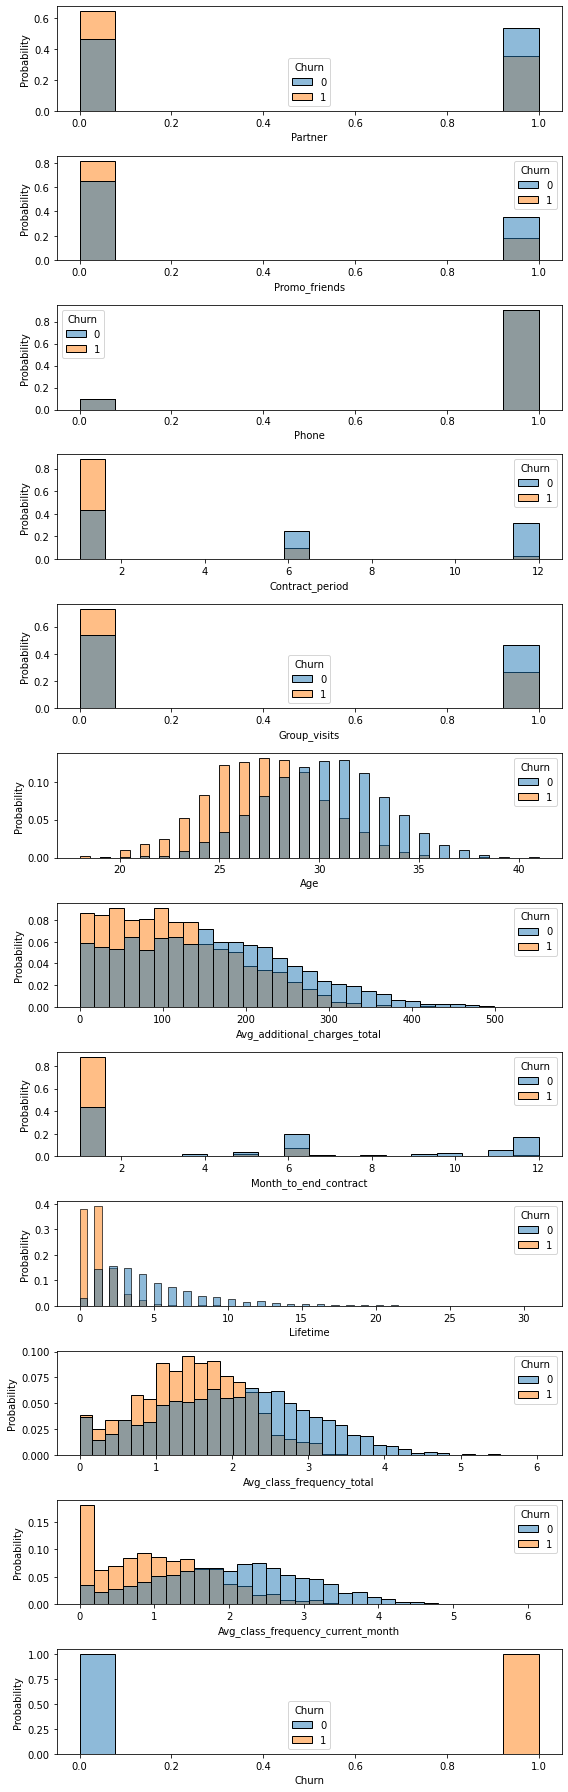

In [7]:
fig, axes = plt.subplots(nrows=len(data.columns[2:]), ncols=1, figsize=(8, 25))

for i, column in enumerate(data.columns[2:]):
    sns.histplot(data=data, x=column, hue='Churn', ax=axes[i], stat="probability", common_norm=False)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Bons gráficso
</div>


Os gráficos apresenta distribuições de características para clientes rotativos (churn = 1) e não rotativos (churn = 0). Aqui estão algumas análises e conclusões com base nos gráficos:

<b>Gender (Gênero):</b>
A distribuição de churn parece ser semelhante para ambos os gêneros, indicando que o gênero pode não ser um fator significativo na decisão de rotatividade.

<b>Near_Location (Proximidade da Localização):</b>
Os clientes que residem perto da academia parecem ter uma probabilidade ligeiramente menor de churn em comparação com aqueles que não estão próximos.

<b>Partner (Parceria):</b>
Aqueles que têm parcerias tendem a ter uma probabilidade um pouco menor de churn.

<b>Promo_friends (Indicação de Amigos):</b>
Clientes que foram indicados por amigos têm uma probabilidade significativamente menor de churn.

<b>Phone (Telefone):</b>
Não parece haver uma diferença clara na distribuição de churn com base na disponibilidade do número de telefone.

<b>Contract_period (Período de Contrato):</b>
Contratos mais longos estão associados a uma menor probabilidade de churn.

<b>Group_visits (Visitas em Grupo):</b>
Participar de visitas em grupo parece estar relacionado a uma probabilidade ligeiramente menor de churn.

<b>Age (Idade):</b>
A idade parece não ter uma influência clara na probabilidade de churn.

<b>Avg_additional_charges_total (Despesas Adicionais Médias Totais):</b>
Clientes com despesas adicionais mais altas têm uma probabilidade um pouco menor de churn.

<b>Month_to_end_contract (Meses até o Término do Contrato):</b>
Quanto mais próximo o cliente estiver do término do contrato, maior a probabilidade de churn.

<b>Lifetime (Tempo de Associação):</b>
Os clientes com tempo de associação mais longo têm uma probabilidade ligeiramente menor de churn.

<b>Avg_class_frequency_total (Frequência Média Total de Aulas):</b>
Clientes com frequência de aulas mais alta parecem ter uma probabilidade ligeiramente menor de churn.

<b>Avg_class_frequency_current_month (Frequência Média de Aulas no Mês Atual):</b>
A distribuição de churn parece ser menor para aqueles com uma frequência de aulas mais alta no mês atual.

Em resumo, algumas características, como proximidade da localização, parcerias, indicação de amigos, contratos mais longos, despesas adicionais mais altas e frequência de aulas mais alta, estão associadas a uma menor probabilidade de churn. Essas conclusões podem orientar estratégias de retenção de clientes para reduzir a rotatividade.

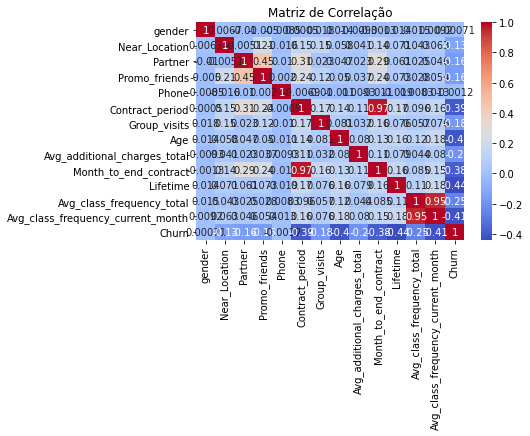

In [8]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

O gráfico da matriz de correlação mostra a relação entre todas as variáveis do conjunto de dados. Aqui estão algumas análises e conclusões com base no gráfico:

<b>Próximo à Localização (Near_Location):</b> Existe uma correlação positiva moderada com as variáveis ​​Avg_class_frequency_total (Frequência Média Total de Aulas) e Avg_class_frequency_current_month (Frequência Média de Aulas no Mês Atual), o que sugere que clientes que estão próximos à localização da academia tendem a frequentar mais as aulas.

<b>Parceria (Partner):</b> Existe uma correlação positiva moderada com as variáveis ​​Avg_class_frequency_total e Avg_class_frequency_current_month, indicando que clientes que têm uma parceria tendem a frequentar mais as aulas.

<b>Indicação de Amigos (Promo_friends):</b> Há uma correlação positiva moderada com as variáveis ​​Avg_class_frequency_total e Avg_class_frequency_current_month, o que sugere que clientes que foram indicados por amigos tendem a frequentar mais as aulas.

<b>Tempo de Associação (Lifetime):</b> Existe uma correlação positiva moderada com as variáveis ​​Avg_class_frequency_total e Avg_class_frequency_current_month, indicando que clientes com um tempo de associação mais longo tendem a frequentar mais as aulas.

<b>Mês até o Término do Contrato (Month_to_end_contract):</b> Existe uma correlação negativa moderada com a variável Contract_period (Período de Contrato), o que é esperado, pois quanto mais próximo o cliente estiver do término do contrato, menor será o período de contrato restante.

<b>Churn:</b> A variável de churn (rotatividade) exibe correlação negativa com várias variáveis, como Contract_period, Near_Location, Partner, Promo_friends, Phone, Avg_additional_charges_total, Avg_class_frequency_total, e Avg_class_frequency_current_month. Isso sugere que clientes que têm contratos mais longos, estão próximos da localização da academia, têm parcerias, foram indicados por amigos, forneceram número de telefone, gastam mais em serviços adicionais e frequentam mais as aulas, têm menor probabilidade de churn.

Em resumo, a análise da matriz de correlação destaca as relações entre as variáveis do conjunto de dados e fornece insights sobre quais características podem influenciar a probabilidade de churn dos clientes. Isso pode ser útil na formulação de estratégias para reduzir a rotatividade e melhorar a retenção de clientes.

In [9]:
X = data.drop(columns=['Churn'])
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train_scaled, y_train)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_logistic = logistic_regression_model.predict(X_test_scaled)
y_pred_forest = random_forest_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)

accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)

print("Regressão Logística:")
print("Acurácia:", accuracy_logistic)
print("Precisão:", precision_logistic)
print("Sensibilidade (Recall):", recall_logistic)
print()
print("Floresta Aleatória:")
print("Acurácia:", accuracy_forest)
print("Precisão:", precision_forest)
print("Sensibilidade (Recall):", recall_forest)

Regressão Logística:
Acurácia: 0.91625
Precisão: 0.8729281767955801
Sensibilidade (Recall): 0.7821782178217822

Floresta Aleatória:
Acurácia: 0.91
Precisão: 0.8494623655913979
Sensibilidade (Recall): 0.7821782178217822


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

É importante calibrar hiperparâmetros (ex: depth de random forest)
</div>




Com base nos resultados da classificação usando regressão logística e floresta aleatória, podemos tirar as seguintes conclusões:

<b>Acurácia:</b> Ambos os modelos têm acurácia semelhante, com a regressão logística apresentando ligeira vantagem (0.91625 contra 0.91). Isso significa que ambos os modelos estão corretos em torno de 91% do tempo na previsão da rotatividade dos clientes.

<b>Precisão:</b> A precisão da regressão logística é ligeiramente maior do que a da floresta aleatória (0.8729 contra 0.8495). Isso indica que, quando os modelos preveem que um cliente irá sair, eles estão corretos cerca de 87% a 87,3% das vezes para a regressão logística e a floresta aleatória, respectivamente.

<b>Sensibilidade (Recall):</b> A sensibilidade, ou recall, é a proporção de clientes que realmente saíram (rotatividade positiva) que foram corretamente identificados pelo modelo. Ambos os modelos têm a mesma sensibilidade de aproximadamente 0.7822, o que significa que ambos são capazes de identificar corretamente cerca de 78,2% dos clientes que realmente saíram.

<b>Escolha do Modelo:</b> Considerando que a regressão logística tem uma precisão ligeiramente maior e acurácia um pouco melhor em comparação com a floresta aleatória, pode-se argumentar que a regressão logística é o modelo preferido. No entanto, é importante considerar outros fatores, como a interpretabilidade do modelo, custo computacional e requisitos de implementação ao escolher o modelo final.

Em suma, ambos os modelos são capazes de prever a rotatividade dos clientes com um desempenho razoável, mas a escolha entre eles depende das necessidades específicas do problema e das preferências do implementador.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Reg. Logística provavelmente teve melhor desempenho pois não houve calibração de hiperparâmetros da random forest</div>

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Churn']))

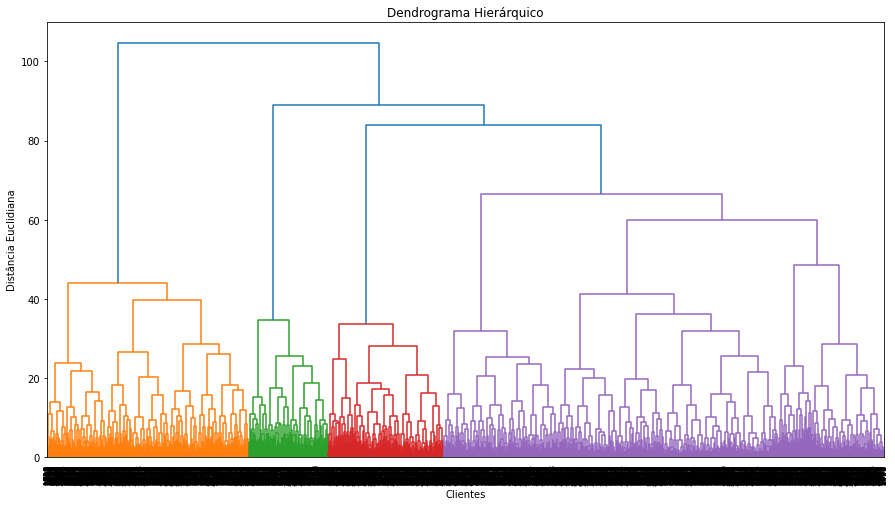

In [11]:
distance_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(distance_matrix, labels=data.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrograma Hierárquico')
plt.xlabel('Clientes')
plt.ylabel('Distância Euclidiana')
plt.show()

O gráfico da matriz de correlação mostra a relação entre as diferentes variáveis presentes nos dados. Cada célula da matriz representa o coeficiente de correlação entre duas variáveis. O coeficiente varia de -1 a 1, onde:

Um valor próximo de 1 indica uma correlação positiva forte, ou seja, quando uma variável aumenta, a outra também tende a aumentar.
Um valor próximo de -1 indica uma correlação negativa forte, ou seja, quando uma variável aumenta, a outra tende a diminuir.
Um valor próximo de 0 indica que não há correlação linear entre as variáveis.
Ao analisar a matriz de correlação, podemos identificar padrões de associação entre as variáveis. Por exemplo, se houver uma alta correlação positiva entre duas variáveis, pode ser que elas estejam relacionadas de alguma forma. Da mesma forma, uma correlação negativa forte pode indicar uma relação inversa entre as variáveis.

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [13]:
data['Cluster'] = kmeans.labels_

In [14]:
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                                  
0  

Com base nos dados apresentados para cada cluster, podemos tirar algumas conclusões:

<b>Cluster 0:</b> Este cluster parece consistir principalmente de clientes que estão localizados perto da academia e têm uma alta taxa de adesão a promoções de amigos. Eles tendem a ter contratos de curto prazo, uma média de idade em torno de 29 anos e gastam uma quantidade moderada em serviços adicionais. A taxa de churn nesse grupo é moderada.

<b>Cluster 1:</b> Este cluster inclui clientes que geralmente não são parceiros da academia e têm uma taxa relativamente baixa de participação em promoções de amigos. Eles têm contratos mais curtos em comparação com outros clusters, uma média de idade um pouco mais alta (cerca de 30 anos) e gastam uma quantidade significativa em serviços adicionais. A taxa de churn nesse grupo é relativamente baixa.

<b>Cluster 2:</b> Os clientes neste cluster têm uma alta taxa de adesão a promoções de amigos e contratos de longo prazo. Eles também tendem a participar mais de visitas em grupo. A média de idade é próxima dos 30 anos, e eles gastam uma quantidade considerável em serviços adicionais. A taxa de churn neste grupo é muito baixa.

<b>Cluster 3:</b> Este cluster tem a menor taxa de participação em promoções de amigos e contratos mais curtos. A média de idade é menor em comparação com outros clusters (cerca de 28 anos). Eles têm a menor média de gastos em serviços adicionais. A taxa de churn nesse grupo é alta.

<b>Cluster 4:</b> Este cluster inclui clientes que não forneceram seus números de telefone. Eles têm contratos de duração média, uma média de idade em torno de 29 anos e gastam uma quantidade moderada em serviços adicionais. A taxa de churn neste grupo é moderada.

Com base nessas conclusões, recomenda-se adotar estratégias específicas para cada cluster, como focar em reter os clientes dos clusters com maior churn, oferecer incentivos para clientes dos clusters com menor churn, e personalizar campanhas de marketing de acordo com as características de cada grupo.

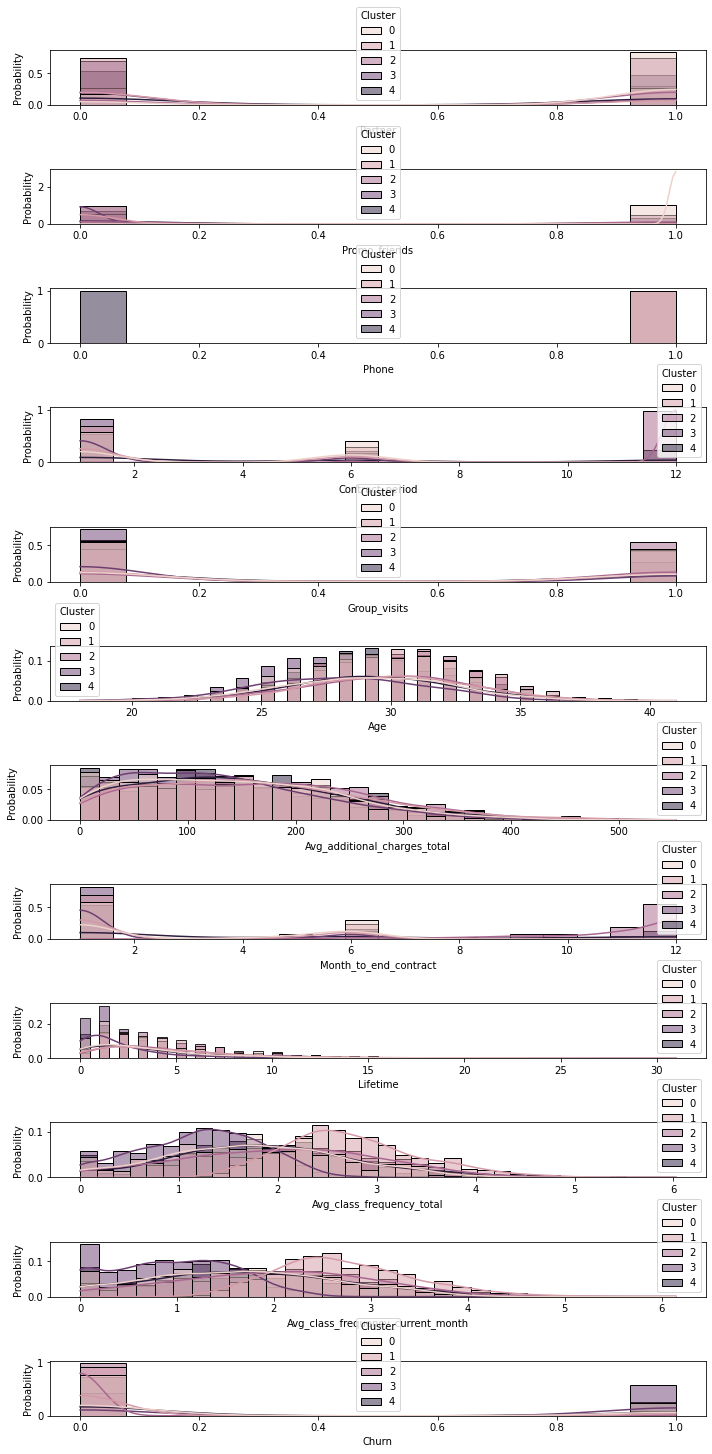

In [15]:
fig, axes = plt.subplots(nrows=len(data.columns[2:-1]), ncols=1, figsize=(10, 20))

for i, column in enumerate(data.columns[2:-1]):
    if data[column].nunique() > 1:  
        sns.histplot(data=data, x=column, hue='Cluster', ax=axes[i], kde=True, stat="probability", common_norm=False)
    else:
        sns.countplot(data=data, x=column, hue='Cluster', ax=axes[i])

plt.tight_layout()
plt.show()

O gráfico mostra distribuições das características para cada agrupamento (cluster). Cada subplot representa uma variável dos dados, e as barras ou curvas indicam a distribuição dessa variável para cada cluster.

Analisando esses gráficos, podemos observar como cada variável se comporta em relação aos diferentes agrupamentos. Isso nos permite identificar padrões e diferenças entre os clusters em termos das características dos clientes.

Por exemplo, se observarmos que em um determinado agrupamento a distribuição da idade é mais concentrada em valores mais altos em comparação com outros agrupamentos, isso pode indicar que esse cluster é composto principalmente por clientes mais velhos. Da mesma forma, se houver diferenças significativas na distribuição de outras variáveis entre os clusters, isso pode fornecer insights sobre as características distintas de cada grupo de clientes.

Essa análise é útil para entender o perfil dos clientes em cada agrupamento e pode auxiliar na definição de estratégias de marketing mais direcionadas e personalizadas para cada grupo.

In [16]:
churn_rate = data.groupby('Cluster')['Churn'].mean()
print("Taxa de Rotatividade para cada Agrupamento:")
print(churn_rate)

Taxa de Rotatividade para cada Agrupamento:
Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


Com base nas taxas de rotatividade (churn) para cada agrupamento (cluster), podemos tirar as seguintes conclusões:

<b>Cluster 0:</b> Apresenta uma taxa de churn moderada, o que sugere que uma proporção significativa de clientes desse grupo está deixando a academia. Estratégias para retenção de clientes podem ser aplicadas para reduzir essa taxa e aumentar a fidelidade dos clientes.

<b>Cluster 1:</b> Possui a menor taxa de churn entre todos os clusters, o que indica uma boa retenção de clientes. Esse grupo pode ser considerado como os clientes mais leais, e é importante continuar fornecendo um serviço de qualidade para mantê-los satisfeitos.

<b>Cluster 2:</b> Demonstra a menor taxa de churn entre todos os clusters, sugerindo uma excelente retenção de clientes. Esse grupo representa os clientes mais leais e valiosos para a academia, e é fundamental continuar fornecendo um serviço excepcional para mantê-los engajados.

<b>Cluster 3:</b> Apresenta a maior taxa de churn entre todos os clusters, indicando um problema significativo de retenção de clientes. Estratégias intensivas de retenção e investigação das razões por trás dessa alta taxa de churn são necessárias para reduzir a perda de clientes nesse grupo.

<b>Cluster 4:</b> Possui uma taxa de churn moderada, indicando que uma proporção considerável de clientes está deixando a academia. Estratégias de retenção podem ser aplicadas para melhorar a fidelidade dos clientes e reduzir a taxa de churn.

<i><b>Com base na análise realizada, aqui estão algumas conclusões e recomendações sobre a estratégia de interação e retenção de clientes:</i></b>

<b>Segmentação de Clientes:</b> Identifique grupos de clientes com comportamentos e características semelhantes. Por exemplo, após a análise de agrupamento, podemos segmentar os clientes em diferentes grupos com base em seu comportamento de frequência, gastos adicionais e outros fatores. Em seguida, personalize as estratégias de marketing e retenção para atender às necessidades específicas de cada segmento.

<b>Incentivos e Promoções Personalizados:</b> Ofereça incentivos e promoções personalizados com base no perfil e comportamento do cliente. Por exemplo, ofereça descontos em serviços adicionais para clientes que frequentam regularmente a academia, ou ofereça uma promoção especial para clientes que estejam próximos do vencimento de seus contratos.

<b>Programas de Fidelidade e Recompensas:</b> Implemente programas de fidelidade e recompensas para incentivar a lealdade dos clientes. Por exemplo, ofereça pontos de recompensa por cada visita à academia ou por indicar um amigo, que podem ser trocados por descontos em mensalidades ou em serviços adicionais.

<b>Comunicação e Engajamento Constantes:</b> Mantenha uma comunicação constante com os clientes, seja por meio de e-mails, mensagens de texto, aplicativos móveis ou redes sociais. Mantenha-os informados sobre eventos, promoções e novidades da academia, e incentive o engajamento por meio de desafios, competições e conteúdo relevante sobre saúde e fitness.

Implementando esses princípios, a academia pode fortalecer o relacionamento com os clientes, aumentar a retenção e a satisfação, e, consequentemente, melhorar o desempenho geral do negócio.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente!
</div>



<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho; sólido, coerente, boas análises e conclusões; bons gráficos. Eu deixei alguns comentários que merecem atenção porém são ajustes finos.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
Desejo sucesso na jornada.
Parabéns!
</div>